РК 2 Кабанец РТ5-61Б Вариант 11
Дерево решений	Градиентный бустинг

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

data = pd.read_csv('hotel_bookings.csv')

In [2]:
print(data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [3]:
missing_values_per_column = data.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]

if columns_with_missing_values.any():
  print("Столбцы с пропусками после заполнения:")
  for col, missing_count in missing_values_per_column[missing_values_per_column > 0].items():
    print(f"{col}: {missing_count}")
else:
  print("В данных после заполнения нет пропусков.")

Столбцы с пропусками после заполнения:
children: 4
country: 488
agent: 16340
company: 112593


In [4]:
# Заполнение пропусков
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

data['children'] = imputer_num.fit_transform(data[['children']])
data['agent'] = data['agent'].fillna(0)
data['country'] = imputer_cat.fit_transform(data[['country']]).ravel()
data['company'] = imputer_cat.fit_transform(data[['company']]).ravel()

missing_values_per_column = data.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]

if columns_with_missing_values.any():
  print("Столбцы с пропусками после заполнения:")
  for col, missing_count in missing_values_per_column[missing_values_per_column > 0].items():
    print(f"{col}: {missing_count}")
else:
  print("В данных после заполнения нет пропусков.")

В данных после заполнения нет пропусков.


In [5]:
# Кодирование категориальных признаков и масштабирование числовых
categorical_features = ['hotel', 'arrival_date_month', 'meal', 'country', 
                        'market_segment', 'distribution_channel', 'reserved_room_type',
                        'assigned_room_type', 'deposit_type', 'customer_type']
numerical_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number',
                      'arrival_date_day_of_month', 'stays_in_weekend_nights', 
                      'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations', 'previous_bookings_not_canceled', 
                      'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
                      'total_of_special_requests', 'agent', 'company']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Разделение данных на обучающую и тестовую выборки
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Модель 1: Дерево решений
tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier(random_state=42))])

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f"Дерево решений - Accuracy: {accuracy_tree}, F1 Score: {f1_tree}")


Дерево решений - Accuracy: 0.863263254878968, F1 Score: 0.8184800133429699


In [7]:
# Модель 2: Градиентный бустинг
boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', GradientBoostingClassifier(random_state=42))])

boosting_model.fit(X_train, y_train)
y_pred_boost = boosting_model.predict(X_test)

accuracy_boost = accuracy_score(y_test, y_pred_boost)
f1_boost = f1_score(y_test, y_pred_boost)

print(f"Градиентный бустинг - Accuracy: {accuracy_boost}, F1 Score: {f1_boost}")


Градиентный бустинг - Accuracy: 0.8510763045481196, F1 Score: 0.7872442263970324


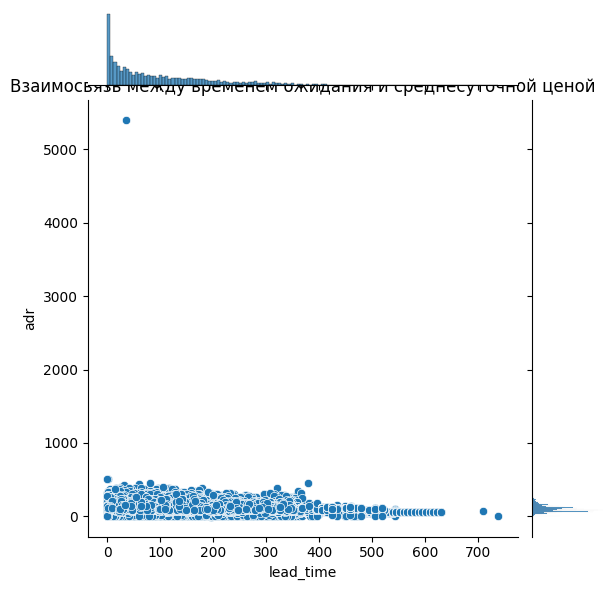

Вывод: Модель дерева решений показала лучшую точность (Accuracy: 0.863) и 
 F1 Score (0.818) по сравнению с моделью градиентного бустинга (Accuracy: 0.851, F1 Score: 0.787).
 Это говорит о том, что в данном случае модель дерева решений более эффективно справляется с задачей предсказания 
 отмены бронирований, несмотря на то, что обычно градиентный бустинг считается более мощным методом.


In [15]:
sns.jointplot(x='lead_time', y='adr', data=data, kind='scatter')
plt.title("Взаимосвязь между временем ожидания и среднесуточной ценой")
plt.show()

print("Вывод: Модель дерева решений показала лучшую точность (Accuracy: 0.863) и \n F1 Score (0.818) по сравнению с моделью градиентного бустинга (Accuracy: 0.851, F1 Score: 0.787).\n Это говорит о том, что в данном случае модель дерева решений более эффективно справляется с задачей предсказания \n отмены бронирований, несмотря на то, что обычно градиентный бустинг считается более мощным методом.")
